# Homework 8: GLMs and GAMs
***

**Name**: Harish Nandhan Shanmugam

***

This assignment is due on Gradescope by **Friday April 25 at 5:00PM**. If you submit the assignment  by this deadline, you will receive 2 bonus points. If you need a little extra time, you may submit your work by **Monday April 28 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There are 2 total questions on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

In [17]:
library(mgcv)

### Problem #1 (50 Points)

Consider a statistical model that attempts to predict whether an office is occupied or not from light, temperature, humidity and CO2 measurements. The variables in the dataset include:

`date`: time year-month-day
`hour`:minute:second
`Temperature`: in Celsius
`Relative Humidity`: as a percentage
`Light`: measured in Lux
`CO2`: in ppm
`Occupancy`: 0 for not occupied, 1 for occupied status

In [18]:
# install.packages('RCurl')
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2)

url = getURL("https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest.txt")
occ = read.csv(text = url)
head(occ[,c(2,3,4,5,7)])
summary(occ[,c(2,3,4,5,7)])

,Temperature,Humidity,Light,CO2,Occupancy
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
140,23.7000,26.272,585.2000,749.2000,1
141,23.7180,26.290,578.4000,760.4000,1
142,23.7300,26.230,572.6667,769.6667,1
143,23.7225,26.125,493.7500,774.7500,1
144,23.7540,26.200,488.6000,779.0000,1
145,23.7600,26.260,568.6667,790.0000,1


  Temperature       Humidity         Light             CO2        
 Min.   :20.20   Min.   :22.10   Min.   :   0.0   Min.   : 427.5  
 1st Qu.:20.65   1st Qu.:23.26   1st Qu.:   0.0   1st Qu.: 466.0  
 Median :20.89   Median :25.00   Median :   0.0   Median : 580.5  
 Mean   :21.43   Mean   :25.35   Mean   : 193.2   Mean   : 717.9  
 3rd Qu.:22.36   3rd Qu.:26.86   3rd Qu.: 442.5   3rd Qu.: 956.3  
 Max.   :24.41   Max.   :31.47   Max.   :1697.2   Max.   :1402.2  
   Occupancy     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.3647  
 3rd Qu.:1.0000  
 Max.   :1.0000  

#### PART A:

Load in the data by executing the cell above and them fit a Generalized Linear Model using `Occupancy` as the response and `Temperature`, `Humidity`, `Light`, and `CO2` as predictors.

- Identify the significant and non-significant features.

- Make interpretations of the coefficient estimates for each of the significant features, commenting on how a unit increase in that particular feature, holding the others constant, will effect the response.

In [19]:
glm_model = glm(Occupancy ~ Temperature + Humidity + Light + CO2, data = occ, family = binomial)
summary(glm_model)


Call:
glm(formula = Occupancy ~ Temperature + Humidity + Light + CO2, 
    family = binomial, data = occ)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -29.316563  11.038232  -2.656  0.00791 ** 
Temperature  -0.333612   0.318492  -1.047  0.29488    
Humidity      1.353727   0.298368   4.537  5.7e-06 ***
Light         0.021921   0.001586  13.819  < 2e-16 ***
CO2          -0.006839   0.003257  -2.099  0.03578 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3496.96  on 2664  degrees of freedom
Residual deviance:  375.66  on 2660  degrees of freedom
AIC: 385.66

Number of Fisher Scoring iterations: 9


- Humidity (p < 0.05)
- Light (p < 0.05)
- CO2 (p < 0.05)
- Temperature is not significant (p > 0.05)

In the fitted glm: Humidity, Light, and CO2 were found to be statistically significant predictors of occupancy, while Temperature was not.

For each unit increase in Humidity, the log-odds of the room being occupied increase by 1.354, holding Light and CO2 constant.

For each unit increase in Light, the log-odds increase by 0.0219, indicating that higher light levels are associated with greater odds of the room being occupied.

For each unit increase in CO2, the log-odds decrease by 0.00684, suggesting that higher CO2 levels are linked with a lower likelihood of occupancy

#### PART B:

Remove `Temperature` and refit the GLM. What has changed?

In [20]:
glm_model_red = glm(Occupancy ~ Humidity + Light + CO2, data = occ, family = binomial)
summary(glm_model_red)


Call:
glm(formula = Occupancy ~ Humidity + Light + CO2, family = binomial, 
    data = occ)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -39.975578   5.116124  -7.814 5.56e-15 ***
Humidity      1.564936   0.237405   6.592 4.34e-11 ***
Light         0.022595   0.001525  14.821  < 2e-16 ***
CO2          -0.009718   0.001907  -5.095 3.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3497.0  on 2664  degrees of freedom
Residual deviance:  376.7  on 2661  degrees of freedom
AIC: 384.7

Number of Fisher Scoring iterations: 9


The significant features' Humidity, Light and CO2 p values decreased more and  became stronger after dropping the temperature feature. AIC slightly increased after dropping this feature. The model become more simpler without compromising the accuracy/predictiion power.

#### PART C:
Use the deviance values to conduct a formal test to determine whether using the reduced model is justified. Explain your results.

In [21]:
deviance_full = deviance(glm_model)
deviance_reduced = deviance(glm_model_red)
resid_full = df.residual(glm_model)
resid_reduced = df.residual(glm_model_red)

chi_sq = deviance_reduced - deviance_full
resid_diff = resid_reduced - resid_full
p_value = pchisq(chi_sq, df = resid_diff, lower.tail = FALSE)

cat("P-value:", p_value, "\n")


P-value: 0.3063742 


The p value of 0.3063742 indicates that the reduced model without the temperature feature is statisticallly justified bercause there is no significant difference between the full and reduced models

#### PART D: (5010 Students Only)

Use a drop in deviance test to compare the null model with the reduced model. Explain your results.

In [22]:
null_model = glm(Occupancy ~ 1, data = occ, family = binomial)
anova(null_model, glm_model_red, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2664,3496.9601,NA,NA,NA
2,2661,376.7014,3,3120.259,0


- H0 : The null model (no predictors) is sufficient.
- H₁: The reduced model is significantly better (predictors
are improving the fit).
- p value of 0 indicates that we reject the null hypothesis. The reduced model is significantly better than the null model.
-  Humidity, Light, and CO2 as predictors results in a substantial improvement in model fit compared to using no predictors at all


### Problem 2: GAMs with Binary Response (50 Points)

In 1911, the Titanic sailed off on its maiden voyage from Southampton, on its way towards New York City. Unfortunately, the ship would eventually collide with an iceberg and sink to the bottom of the ocean. As the ship was sinking, it is said that lifeboats (and floating doors) were prioritized for women and children, and thus many of them were able to surive until rescue arrived. This poses an interesting statistical question. If we have the list of passengers, can we predict who will survive the sinking of the Titanic?

It turns out that GAMs can be used for different kinds of response as well, including Binary responses. That means we can use GAMs to try to answer our question. We load in the data below. It may help to do some basic data analysis before doing too much modeling.

In [24]:
# Load in the Data
titanic = read.csv("titanic.csv")
head(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


#### PART A: Data Cleaning

Before we get to work, we need to clean up this data a bit. If you look over it, you will notice a fair number of columns, many missing values and some NA values. We're going to need to clean our data before we're able to do any modelling. When you're done, you will have a cleaned dataset `titanic`, your training set `titanic.train` and your test set `titanic.test`. Here's what needs to be done:

* We have a lot of predictors, but we don't need them all. Restrict the data to on the `Survived`, `Pclass`, `Sex`, `Age` and `Fare` columns.
* There's still missing data in our dataframe. That won't do. Remove any rows that have at least one missing value in any column.
* If you look at the types of each column, you'll notice that some factors have been loaded as numeric. We should change that. Set `Survived` and `Pclass` to categorical.
* We will eventually want to analyze how well our model performs. Split the data into training and test sets. Do this by putting every fifth row into the test set, and use the rest for training. For example, the first 4 rows will be in the training set, and the $5^{th}$ row will be in the test set. Repeat that pattern for the rest of the data.

In [25]:
titanic = titanic[, c("Survived", "Pclass", "Sex", "Age", "Fare")]
titanic = na.omit(titanic)
titanic$Survived = as.factor(titanic$Survived)
titanic$Pclass = as.factor(titanic$Pclass)

test_indices = seq(5, nrow(titanic), by = 5)
titanic.test = titanic[test_indices, ]
titanic.train = titanic[-test_indices, ]

#### PART B: Fit Your GAM

Now that our dataset is clean, we can fit our model. Fit your GAM as `titanic.gam` with `Survived` as your response and all other values as predictors. Make sure to smooth the necesary predictors!

Hint: The response is binary, so you will need to tell your model to expect that. How did we do that when we were fitting GLMs?

Look at the summary for your GAM model. Where any predictors insignificant? Save the string name of any/all insignificant predictors into the list `insig.predictors`.

In [26]:
library(mgcv)
titanic.gam = gam(Survived ~ Pclass + Sex + s(Age) + s(Fare),
                   family = binomial, data = titanic.train)
summary(titanic.gam)


insig.predictors = c("Fare")


Family: binomial 
Link function: logit 

Formula:
Survived ~ Pclass + Sex + s(Age) + s(Fare)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.6562     0.3394   7.826 5.03e-15 ***
Pclass2      -1.4661     0.3756  -3.904 9.47e-05 ***
Pclass3      -2.4575     0.4024  -6.107 1.01e-09 ***
Sexmale      -2.4886     0.2315 -10.752  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df Chi.sq p-value   
s(Age)  3.995  4.959  19.28 0.00155 **
s(Fare) 2.024  2.524   1.26 0.52023   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.387   Deviance explained = 31.8%
UBRE = -0.043402  Scale est. = 1         n = 572

Age (smoothed), Sex and Pclass were significant predictors of survival

Fare (smoothed) was not significant, meaning it did not contribute meaningfully to the prediction of survival after accounting for the other features

#### PART C: Effective Degrees of Freedom

Let's take a look at our continuous predictors and see if they appear linearly in our GAM model. There are two ways of doing this:

* Use the `plot.gam()` function to plot the curves of your continuous predictors.
* Look at the Effective Degrees of Freedom for the continuous variables.

After conducting these analysis, determine whether each continuous predictor is linear or not. Remember, in statistical terms, a "smooth term" is linear if you can draw a line through the 95% confidence band.

Save your answer as `TRUE` if it is linear and `FALSE` if it is not. Use `age.is.linear` for `Age` and `Fare.is.linear` for `Fare`.


Family: binomial 
Link function: logit 

Formula:
Survived ~ Pclass + Sex + s(Age) + s(Fare)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.6562     0.3394   7.826 5.03e-15 ***
Pclass2      -1.4661     0.3756  -3.904 9.47e-05 ***
Pclass3      -2.4575     0.4024  -6.107 1.01e-09 ***
Sexmale      -2.4886     0.2315 -10.752  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df Chi.sq p-value   
s(Age)  3.995  4.959  19.28 0.00155 **
s(Fare) 2.024  2.524   1.26 0.52023   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.387   Deviance explained = 31.8%
UBRE = -0.043402  Scale est. = 1         n = 572

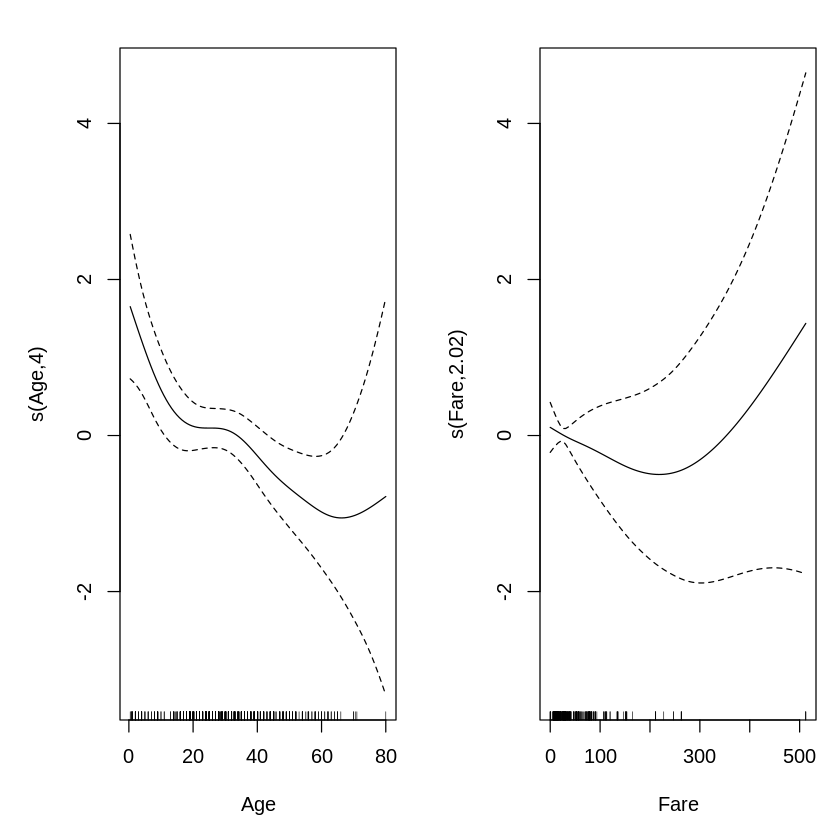

In [28]:
plot(titanic.gam, pages = 1, se = TRUE, shade = TRUE)
summary(titanic.gam)
age.is.linear = FALSE
fare.is.linear = FALSE

Age: With an Effective dof of 3.995 and a clearly curved smooth plot, we conclude the effect is nonlinear.

Fare: Although the p-value is high, the Effective dof is 2.024, and the plot shows nonlinear curvature, especially at high values. Thus, we also consider it nonlinear.